In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
fake = pd.read_csv('Fake.csv')
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
true = pd.read_csv('True.csv')
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
true['is_fake'] = 0
fake['is_fake'] = 1

In [ ]:
news = pd.concat([true, fake], axis=0)

In [ ]:
news.head(10)

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [ ]:
news.tail(10)

,title,text,subject,date,is_fake
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",1
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",1
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",1
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",1
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",1
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [ ]:
# Rows and columns of fake news dataset
print(f"News dataset has: {news.shape[0]} rows")
print(f"News dataset has: {news.shape[1]} columns")

News dataset has: 44898 rows
News dataset has: 5 columns


In [ ]:
#checking for null values
news.isna().sum()

title      0
text       0
subject    0
date       0
is_fake    0
dtype: int64

In [ ]:
news.duplicated().sum()

209

In [ ]:
# remove duplicates
news = news.drop_duplicates(keep='first')
news.duplicated().sum()

0

In [ ]:
import plotly.express as px
fig = px.pie(news, names = "is_fake", title = "Are news fake?",
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))


In [ ]:
import plotly.express as px

fig = px.pie(news, names = "subject", title = "News Subject", hole = 0.5,
            width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

In [ ]:
# news['news'] = news['title'] + ' ' + news['subject']
# news.head(10)

news.rename(columns = {'title':'news'}, inplace = True)
news.drop(['text', 'subject', 'date'], axis=1, inplace=True)
news.head(10)

,news,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",0
1,U.S. military to accept transgender recruits o...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,FBI Russia probe helped by Australian diplomat...,0
4,Trump wants Postal Service to charge 'much mor...,0
5,"White House, Congress prepare for talks on spe...",0
6,"Trump says Russia probe will be fair, but time...",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,0
8,Trump on Twitter (Dec 28) - Global Warming,0
9,Alabama official to certify Senator-elect Jone...,0


In [ ]:
# news.drop(['title', 'text'], axis=1, inplace=True)
# news.head(10)

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   news     44689 non-null  object
 1   is_fake  44689 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
news = news.sample(frac = 1)
news.head(10)

,news,is_fake
10649,Clinton opposes recommendation to drop limits ...,0
4849,WATCH: White Racist Tells Black Quarterback T...,1
10652,JOE BIDEN’S NIECE Too Big To Jail? Released Af...,1
7897,"Clinton campaign struggled to balance unions, ...",0
1851,"Ryan hopes to combine DACA, border security in...",0
15328,N.C. EVENT TO CHANGE ITS NAME BECAUSE THE WORD...,1
8048,History Professor Shuts Down Ted Cruz’s Lies ...,1
12399,At least 39 Yemenis dead in Saudi-led raid on ...,0
16783,OPEN-BORDER LIBERALS Put Entire Nation On High...,1
16736,Austrian conservative Kurz says needs more tim...,0


In [ ]:
#library that contains punctuation
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

news.to_csv('start.csv', encoding='utf-8', index=False)

#storing the puntuation free text
news['clean_news']= news['news'].apply(lambda x:remove_punctuation(x))
news.head(10)

,news,is_fake,clean_news
10649,Clinton opposes recommendation to drop limits ...,0,Clinton opposes recommendation to drop limits ...
4849,WATCH: White Racist Tells Black Quarterback T...,1,WATCH White Racist Tells Black Quarterback To...
10652,JOE BIDEN’S NIECE Too Big To Jail? Released Af...,1,JOE BIDEN’S NIECE Too Big To Jail Released Aft...
7897,"Clinton campaign struggled to balance unions, ...",0,Clinton campaign struggled to balance unions e...
1851,"Ryan hopes to combine DACA, border security in...",0,Ryan hopes to combine DACA border security in ...
15328,N.C. EVENT TO CHANGE ITS NAME BECAUSE THE WORD...,1,NC EVENT TO CHANGE ITS NAME BECAUSE THE WORD ‘...
8048,History Professor Shuts Down Ted Cruz’s Lies ...,1,History Professor Shuts Down Ted Cruz’s Lies ...
12399,At least 39 Yemenis dead in Saudi-led raid on ...,0,At least 39 Yemenis dead in Saudiled raid on p...
16783,OPEN-BORDER LIBERALS Put Entire Nation On High...,1,OPENBORDER LIBERALS Put Entire Nation On High ...
16736,Austrian conservative Kurz says needs more tim...,0,Austrian conservative Kurz says needs more tim...


In [ ]:
news['news_lower']= news['clean_news'].apply(lambda x: x.lower())
news.head(10)

,news,is_fake,clean_news,news_lower
10649,Clinton opposes recommendation to drop limits ...,0,Clinton opposes recommendation to drop limits ...,clinton opposes recommendation to drop limits ...
4849,WATCH: White Racist Tells Black Quarterback T...,1,WATCH White Racist Tells Black Quarterback To...,watch white racist tells black quarterback to...
10652,JOE BIDEN’S NIECE Too Big To Jail? Released Af...,1,JOE BIDEN’S NIECE Too Big To Jail Released Aft...,joe biden’s niece too big to jail released aft...
7897,"Clinton campaign struggled to balance unions, ...",0,Clinton campaign struggled to balance unions e...,clinton campaign struggled to balance unions e...
1851,"Ryan hopes to combine DACA, border security in...",0,Ryan hopes to combine DACA border security in ...,ryan hopes to combine daca border security in ...
15328,N.C. EVENT TO CHANGE ITS NAME BECAUSE THE WORD...,1,NC EVENT TO CHANGE ITS NAME BECAUSE THE WORD ‘...,nc event to change its name because the word ‘...
8048,History Professor Shuts Down Ted Cruz’s Lies ...,1,History Professor Shuts Down Ted Cruz’s Lies ...,history professor shuts down ted cruz’s lies ...
12399,At least 39 Yemenis dead in Saudi-led raid on ...,0,At least 39 Yemenis dead in Saudiled raid on p...,at least 39 yemenis dead in saudiled raid on p...
16783,OPEN-BORDER LIBERALS Put Entire Nation On High...,1,OPENBORDER LIBERALS Put Entire Nation On High ...,openborder liberals put entire nation on high ...
16736,Austrian conservative Kurz says needs more tim...,0,Austrian conservative Kurz says needs more tim...,austrian conservative kurz says needs more tim...


In [ ]:
#applying function to the column
news['news_tokenied']= news['news_lower'].apply(lambda x: nltk.word_tokenize(x))
news.head(10)

,news,is_fake,clean_news,news_lower,news_tokenied
10649,Clinton opposes recommendation to drop limits ...,0,Clinton opposes recommendation to drop limits ...,clinton opposes recommendation to drop limits ...,"[clinton, opposes, recommendation, to, drop, l..."
4849,WATCH: White Racist Tells Black Quarterback T...,1,WATCH White Racist Tells Black Quarterback To...,watch white racist tells black quarterback to...,"[watch, white, racist, tells, black, quarterba..."
10652,JOE BIDEN’S NIECE Too Big To Jail? Released Af...,1,JOE BIDEN’S NIECE Too Big To Jail Released Aft...,joe biden’s niece too big to jail released aft...,"[joe, biden, ’, s, niece, too, big, to, jail, ..."
7897,"Clinton campaign struggled to balance unions, ...",0,Clinton campaign struggled to balance unions e...,clinton campaign struggled to balance unions e...,"[clinton, campaign, struggled, to, balance, un..."
1851,"Ryan hopes to combine DACA, border security in...",0,Ryan hopes to combine DACA border security in ...,ryan hopes to combine daca border security in ...,"[ryan, hopes, to, combine, daca, border, secur..."
15328,N.C. EVENT TO CHANGE ITS NAME BECAUSE THE WORD...,1,NC EVENT TO CHANGE ITS NAME BECAUSE THE WORD ‘...,nc event to change its name because the word ‘...,"[nc, event, to, change, its, name, because, th..."
8048,History Professor Shuts Down Ted Cruz’s Lies ...,1,History Professor Shuts Down Ted Cruz’s Lies ...,history professor shuts down ted cruz’s lies ...,"[history, professor, shuts, down, ted, cruz, ’..."
12399,At least 39 Yemenis dead in Saudi-led raid on ...,0,At least 39 Yemenis dead in Saudiled raid on p...,at least 39 yemenis dead in saudiled raid on p...,"[at, least, 39, yemenis, dead, in, saudiled, r..."
16783,OPEN-BORDER LIBERALS Put Entire Nation On High...,1,OPENBORDER LIBERALS Put Entire Nation On High ...,openborder liberals put entire nation on high ...,"[openborder, liberals, put, entire, nation, on..."
16736,Austrian conservative Kurz says needs more tim...,0,Austrian conservative Kurz says needs more tim...,austrian conservative kurz says needs more tim...,"[austrian, conservative, kurz, says, needs, mo..."


In [ ]:
#importing nlp library
import nltk

#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
news['no_stopwords']= news['news_tokenied'].apply(lambda x:remove_stopwords(x))
news.head(10)

,news,is_fake,clean_news,news_lower,news_tokenied,no_stopwords
10649,Clinton opposes recommendation to drop limits ...,0,Clinton opposes recommendation to drop limits ...,clinton opposes recommendation to drop limits ...,"[clinton, opposes, recommendation, to, drop, l...","[clinton, opposes, recommendation, drop, limit..."
4849,WATCH: White Racist Tells Black Quarterback T...,1,WATCH White Racist Tells Black Quarterback To...,watch white racist tells black quarterback to...,"[watch, white, racist, tells, black, quarterba...","[watch, white, racist, tells, black, quarterba..."
10652,JOE BIDEN’S NIECE Too Big To Jail? Released Af...,1,JOE BIDEN’S NIECE Too Big To Jail Released Aft...,joe biden’s niece too big to jail released aft...,"[joe, biden, ’, s, niece, too, big, to, jail, ...","[joe, biden, ’, niece, big, jail, released, 10..."
7897,"Clinton campaign struggled to balance unions, ...",0,Clinton campaign struggled to balance unions e...,clinton campaign struggled to balance unions e...,"[clinton, campaign, struggled, to, balance, un...","[clinton, campaign, struggled, balance, unions..."
1851,"Ryan hopes to combine DACA, border security in...",0,Ryan hopes to combine DACA border security in ...,ryan hopes to combine daca border security in ...,"[ryan, hopes, to, combine, daca, border, secur...","[ryan, hopes, combine, daca, border, security,..."
15328,N.C. EVENT TO CHANGE ITS NAME BECAUSE THE WORD...,1,NC EVENT TO CHANGE ITS NAME BECAUSE THE WORD ‘...,nc event to change its name because the word ‘...,"[nc, event, to, change, its, name, because, th...","[nc, event, change, name, word, ‘, dixie, ’, r..."
8048,History Professor Shuts Down Ted Cruz’s Lies ...,1,History Professor Shuts Down Ted Cruz’s Lies ...,history professor shuts down ted cruz’s lies ...,"[history, professor, shuts, down, ted, cruz, ’...","[history, professor, shuts, ted, cruz, ’, lies..."
12399,At least 39 Yemenis dead in Saudi-led raid on ...,0,At least 39 Yemenis dead in Saudiled raid on p...,at least 39 yemenis dead in saudiled raid on p...,"[at, least, 39, yemenis, dead, in, saudiled, r...","[least, 39, yemenis, dead, saudiled, raid, pol..."
16783,OPEN-BORDER LIBERALS Put Entire Nation On High...,1,OPENBORDER LIBERALS Put Entire Nation On High ...,openborder liberals put entire nation on high ...,"[openborder, liberals, put, entire, nation, on...","[openborder, liberals, put, entire, nation, hi..."
16736,Austrian conservative Kurz says needs more tim...,0,Austrian conservative Kurz says needs more tim...,austrian conservative kurz says needs more tim...,"[austrian, conservative, kurz, says, needs, mo...","[austrian, conservative, kurz, says, needs, ti..."


In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

news['news_stemmed']=news['no_stopwords'].apply(lambda x: stemming(x))
news.head(10)

,news,is_fake,clean_news,news_lower,news_tokenied,no_stopwords,news_stemmed
10649,Clinton opposes recommendation to drop limits ...,0,Clinton opposes recommendation to drop limits ...,clinton opposes recommendation to drop limits ...,"[clinton, opposes, recommendation, to, drop, l...","[clinton, opposes, recommendation, drop, limit...","[clinton, oppos, recommend, drop, limit, futur..."
4849,WATCH: White Racist Tells Black Quarterback T...,1,WATCH White Racist Tells Black Quarterback To...,watch white racist tells black quarterback to...,"[watch, white, racist, tells, black, quarterba...","[watch, white, racist, tells, black, quarterba...","[watch, white, racist, tell, black, quarterbac..."
10652,JOE BIDEN’S NIECE Too Big To Jail? Released Af...,1,JOE BIDEN’S NIECE Too Big To Jail Released Aft...,joe biden’s niece too big to jail released aft...,"[joe, biden, ’, s, niece, too, big, to, jail, ...","[joe, biden, ’, niece, big, jail, released, 10...","[joe, biden, ’, niec, big, jail, releas, 100k,..."
7897,"Clinton campaign struggled to balance unions, ...",0,Clinton campaign struggled to balance unions e...,clinton campaign struggled to balance unions e...,"[clinton, campaign, struggled, to, balance, un...","[clinton, campaign, struggled, balance, unions...","[clinton, campaign, struggl, balanc, union, en..."
1851,"Ryan hopes to combine DACA, border security in...",0,Ryan hopes to combine DACA border security in ...,ryan hopes to combine daca border security in ...,"[ryan, hopes, to, combine, daca, border, secur...","[ryan, hopes, combine, daca, border, security,...","[ryan, hope, combin, daca, border, secur, immi..."
15328,N.C. EVENT TO CHANGE ITS NAME BECAUSE THE WORD...,1,NC EVENT TO CHANGE ITS NAME BECAUSE THE WORD ‘...,nc event to change its name because the word ‘...,"[nc, event, to, change, its, name, because, th...","[nc, event, change, name, word, ‘, dixie, ’, r...","[nc, event, chang, name, word, ‘, dixi, ’, rac..."
8048,History Professor Shuts Down Ted Cruz’s Lies ...,1,History Professor Shuts Down Ted Cruz’s Lies ...,history professor shuts down ted cruz’s lies ...,"[history, professor, shuts, down, ted, cruz, ’...","[history, professor, shuts, ted, cruz, ’, lies...","[histori, professor, shut, ted, cruz, ’, lie, ..."
12399,At least 39 Yemenis dead in Saudi-led raid on ...,0,At least 39 Yemenis dead in Saudiled raid on p...,at least 39 yemenis dead in saudiled raid on p...,"[at, least, 39, yemenis, dead, in, saudiled, r...","[least, 39, yemenis, dead, saudiled, raid, pol...","[least, 39, yemeni, dead, saudil, raid, polic,..."
16783,OPEN-BORDER LIBERALS Put Entire Nation On High...,1,OPENBORDER LIBERALS Put Entire Nation On High ...,openborder liberals put entire nation on high ...,"[openborder, liberals, put, entire, nation, on...","[openborder, liberals, put, entire, nation, hi...","[openbord, liber, put, entir, nation, high, al..."
16736,Austrian conservative Kurz says needs more tim...,0,Austrian conservative Kurz says needs more tim...,austrian conservative kurz says needs more tim...,"[austrian, conservative, kurz, says, needs, mo...","[austrian, conservative, kurz, says, needs, ti...","[austrian, conserv, kurz, say, need, time, coa..."


In [ ]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

news['news_lemmatized'] = news['news_stemmed'].apply(lambda x:lemmatizer(x))
news.head(10)

,news,is_fake,clean_news,news_lower,news_tokenied,no_stopwords,news_stemmed,news_lemmatized
10649,Clinton opposes recommendation to drop limits ...,0,Clinton opposes recommendation to drop limits ...,clinton opposes recommendation to drop limits ...,"[clinton, opposes, recommendation, to, drop, l...","[clinton, opposes, recommendation, drop, limit...","[clinton, oppos, recommend, drop, limit, futur...","[clinton, oppos, recommend, drop, limit, futur..."
4849,WATCH: White Racist Tells Black Quarterback T...,1,WATCH White Racist Tells Black Quarterback To...,watch white racist tells black quarterback to...,"[watch, white, racist, tells, black, quarterba...","[watch, white, racist, tells, black, quarterba...","[watch, white, racist, tell, black, quarterbac...","[watch, white, racist, tell, black, quarterbac..."
10652,JOE BIDEN’S NIECE Too Big To Jail? Released Af...,1,JOE BIDEN’S NIECE Too Big To Jail Released Aft...,joe biden’s niece too big to jail released aft...,"[joe, biden, ’, s, niece, too, big, to, jail, ...","[joe, biden, ’, niece, big, jail, released, 10...","[joe, biden, ’, niec, big, jail, releas, 100k,...","[joe, biden, ’, niec, big, jail, releas, 100k,..."
7897,"Clinton campaign struggled to balance unions, ...",0,Clinton campaign struggled to balance unions e...,clinton campaign struggled to balance unions e...,"[clinton, campaign, struggled, to, balance, un...","[clinton, campaign, struggled, balance, unions...","[clinton, campaign, struggl, balanc, union, en...","[clinton, campaign, struggl, balanc, union, en..."
1851,"Ryan hopes to combine DACA, border security in...",0,Ryan hopes to combine DACA border security in ...,ryan hopes to combine daca border security in ...,"[ryan, hopes, to, combine, daca, border, secur...","[ryan, hopes, combine, daca, border, security,...","[ryan, hope, combin, daca, border, secur, immi...","[ryan, hope, combin, daca, border, secur, immi..."
15328,N.C. EVENT TO CHANGE ITS NAME BECAUSE THE WORD...,1,NC EVENT TO CHANGE ITS NAME BECAUSE THE WORD ‘...,nc event to change its name because the word ‘...,"[nc, event, to, change, its, name, because, th...","[nc, event, change, name, word, ‘, dixie, ’, r...","[nc, event, chang, name, word, ‘, dixi, ’, rac...","[nc, event, chang, name, word, ‘, dixi, ’, rac..."
8048,History Professor Shuts Down Ted Cruz’s Lies ...,1,History Professor Shuts Down Ted Cruz’s Lies ...,history professor shuts down ted cruz’s lies ...,"[history, professor, shuts, down, ted, cruz, ’...","[history, professor, shuts, ted, cruz, ’, lies...","[histori, professor, shut, ted, cruz, ’, lie, ...","[histori, professor, shut, ted, cruz, ’, lie, ..."
12399,At least 39 Yemenis dead in Saudi-led raid on ...,0,At least 39 Yemenis dead in Saudiled raid on p...,at least 39 yemenis dead in saudiled raid on p...,"[at, least, 39, yemenis, dead, in, saudiled, r...","[least, 39, yemenis, dead, saudiled, raid, pol...","[least, 39, yemeni, dead, saudil, raid, polic,...","[least, 39, yemeni, dead, saudil, raid, polic,..."
16783,OPEN-BORDER LIBERALS Put Entire Nation On High...,1,OPENBORDER LIBERALS Put Entire Nation On High ...,openborder liberals put entire nation on high ...,"[openborder, liberals, put, entire, nation, on...","[openborder, liberals, put, entire, nation, hi...","[openbord, liber, put, entir, nation, high, al...","[openbord, liber, put, entir, nation, high, al..."
16736,Austrian conservative Kurz says needs more tim...,0,Austrian conservative Kurz says needs more tim...,austrian conservative kurz says needs more tim...,"[austrian, conservative, kurz, says, needs, mo...","[austrian, conservative, kurz, says, needs, ti...","[austrian, conserv, kurz, say, need, time, coa...","[austrian, conserv, kurz, say, need, time, coa..."


In [ ]:
news['news_lemmatized'] = news['news_lemmatized'].apply(lambda x: ' '.join(x))
news.head(10)

,news,is_fake,clean_news,news_lower,news_tokenied,no_stopwords,news_stemmed,news_lemmatized
10649,Clinton opposes recommendation to drop limits ...,0,Clinton opposes recommendation to drop limits ...,clinton opposes recommendation to drop limits ...,"[clinton, opposes, recommendation, to, drop, l...","[clinton, opposes, recommendation, drop, limit...","[clinton, oppos, recommend, drop, limit, futur...",clinton oppos recommend drop limit futur contract
4849,WATCH: White Racist Tells Black Quarterback T...,1,WATCH White Racist Tells Black Quarterback To...,watch white racist tells black quarterback to...,"[watch, white, racist, tells, black, quarterba...","[watch, white, racist, tells, black, quarterba...","[watch, white, racist, tell, black, quarterbac...",watch white racist tell black quarterback stan...
10652,JOE BIDEN’S NIECE Too Big To Jail? Released Af...,1,JOE BIDEN’S NIECE Too Big To Jail Released Aft...,joe biden’s niece too big to jail released aft...,"[joe, biden, ’, s, niece, too, big, to, jail, ...","[joe, biden, ’, niece, big, jail, released, 10...","[joe, biden, ’, niec, big, jail, releas, 100k,...",joe biden ’ niec big jail releas 100k credit c...
7897,"Clinton campaign struggled to balance unions, ...",0,Clinton campaign struggled to balance unions e...,clinton campaign struggled to balance unions e...,"[clinton, campaign, struggled, to, balance, un...","[clinton, campaign, struggled, balance, unions...","[clinton, campaign, struggl, balanc, union, en...",clinton campaign struggl balanc union environm...
1851,"Ryan hopes to combine DACA, border security in...",0,Ryan hopes to combine DACA border security in ...,ryan hopes to combine daca border security in ...,"[ryan, hopes, to, combine, daca, border, secur...","[ryan, hopes, combine, daca, border, security,...","[ryan, hope, combin, daca, border, secur, immi...",ryan hope combin daca border secur immigr bill...
15328,N.C. EVENT TO CHANGE ITS NAME BECAUSE THE WORD...,1,NC EVENT TO CHANGE ITS NAME BECAUSE THE WORD ‘...,nc event to change its name because the word ‘...,"[nc, event, to, change, its, name, because, th...","[nc, event, change, name, word, ‘, dixie, ’, r...","[nc, event, chang, name, word, ‘, dixi, ’, rac...",nc event chang name word ‘ dixi ’ racist ‘ off...
8048,History Professor Shuts Down Ted Cruz’s Lies ...,1,History Professor Shuts Down Ted Cruz’s Lies ...,history professor shuts down ted cruz’s lies ...,"[history, professor, shuts, down, ted, cruz, ’...","[history, professor, shuts, ted, cruz, ’, lies...","[histori, professor, shut, ted, cruz, ’, lie, ...",histori professor shut ted cruz ’ lie suprem c...
12399,At least 39 Yemenis dead in Saudi-led raid on ...,0,At least 39 Yemenis dead in Saudiled raid on p...,at least 39 yemenis dead in saudiled raid on p...,"[at, least, 39, yemenis, dead, in, saudiled, r...","[least, 39, yemenis, dead, saudiled, raid, pol...","[least, 39, yemeni, dead, saudil, raid, polic,...",least 39 yemeni dead saudil raid polic camp sa...
16783,OPEN-BORDER LIBERALS Put Entire Nation On High...,1,OPENBORDER LIBERALS Put Entire Nation On High ...,openborder liberals put entire nation on high ...,"[openborder, liberals, put, entire, nation, on...","[openborder, liberals, put, entire, nation, hi...","[openbord, liber, put, entir, nation, high, al...",openbord liber put entir nation high alert ger...
16736,Austrian conservative Kurz says needs more tim...,0,Austrian conservative Kurz says needs more tim...,austrian conservative kurz says needs more tim...,"[austrian, conservative, kurz, says, needs, mo...","[austrian, conservative, kurz, says, needs, ti...","[austrian, conserv, kurz, say, need, time, coa...",austrian conserv kurz say need time coalit talk


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(news['news_lemmatized'])

In [ ]:
print(X)

  (0, 3727)	0.4303749955190104
  (0, 6406)	0.3709649568758729
  (0, 8866)	0.3806618634048709
  (0, 4895)	0.3278861914237084
  (0, 12171)	0.48301798037309396
  (0, 10647)	0.37416337888542056
  (0, 3369)	0.22681479617128755
  (1, 3294)	0.38481823634700035
  (1, 8995)	0.2946166957011186
  (1, 1288)	0.34011806902668273
  (1, 10062)	0.2632343872420504
  (1, 14027)	0.30664991549861254
  (1, 11933)	0.4648846831404371
  (1, 2221)	0.2372711211608672
  (1, 14642)	0.2475473319761501
  (1, 11986)	0.2648361609804903
  (1, 16224)	0.20742704649731028
  (1, 16079)	0.19811589159626813
  (2, 6265)	0.2831433071441481
  (2, 2903)	0.32989201530532397
  (2, 3937)	0.3245405031482113
  (2, 15)	0.4005014194770992
  (2, 12315)	0.24330388652110874
  (2, 8095)	0.27379403504794825
  (2, 2148)	0.25929428324581727
  :	:
  (44685, 16292)	0.2349910278983641
  (44685, 11538)	0.32817144464321235
  (44685, 15131)	0.09519264392438012
  (44686, 14903)	0.5001419746919301
  (44686, 4339)	0.543553858681885
  (44686, 4566)	0.4

In [ ]:
X.shape

(44689, 16591)

In [ ]:
y = news['is_fake'].values

In [ ]:
y.shape

(44689,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train.shape, X_test.shape

((35751, 16591), (8938, 16591))

### Naive Bayes

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
ans = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print("Multinomial Naive Bayes\nAccuracy score: ", ans)

Multinomial Naive Bayes
Accuracy score:  0.9309688968449318


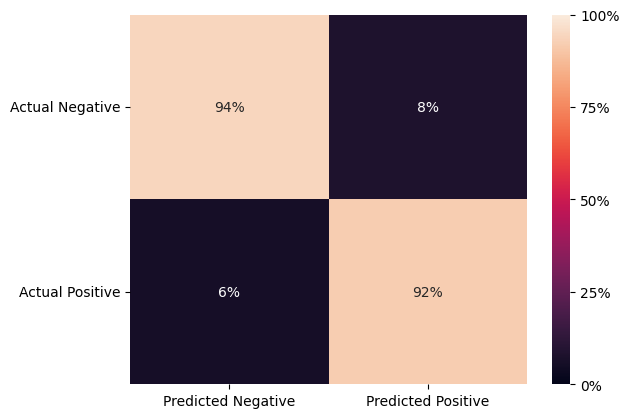

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion = confusion.div(confusion.sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,  precision_score, recall_score, log_loss

print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 3)}')
print(f"Log Loss:  {round(log_loss(y_test, y_pred), 3)}\n")
print(f"F1 Score: {round(f1_score(y_test, y_pred), 3)}")
print(f"Precision: {round(precision_score(y_test,y_pred), 3)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 3)}\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.931
Log Loss:  2.488

F1 Score: 0.935
Precision: 0.922
Recall: 0.949

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4233
           1       0.92      0.95      0.94      4705

    accuracy                           0.93      8938
   macro avg       0.93      0.93      0.93      8938
weighted avg       0.93      0.93      0.93      8938



### Support Vector Machine

In [ ]:
from sklearn.svm import SVC, LinearSVC

svm_model =  SVC(kernel='linear', probability=True) # SVC(kernel = 'rbf', random_state = 0)
svm_model.fit(X_train, y_train)
ans1 = svm_model.score(X_test, y_test)
y_pred1 = svm_model.predict(X_test)

print("Support Vector Machine\nAccuracy score: ", ans1)

Support Vector Machine
Accuracy score:  0.9470798836428731


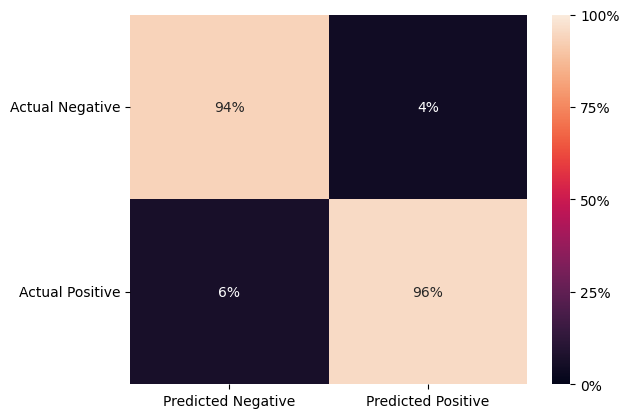

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred1))
confusion = confusion.div(confusion.sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,  precision_score, recall_score

print(f'Accuracy: {round(accuracy_score(y_test, y_pred1), 3)}')
print(f"Log Loss:  {round(log_loss(y_test, y_pred1), 3)}\n")
print(f"F1 Score: {round(f1_score(y_test, y_pred1), 3)}")
print(f"Precision: {round(precision_score(y_test,y_pred1), 3)}")
print(f"Recall: {round(recall_score(y_test, y_pred1), 3)}\n")
print(classification_report(y_test, y_pred1))

Accuracy: 0.947
Log Loss:  1.907

F1 Score: 0.949
Precision: 0.957
Recall: 0.942

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4233
           1       0.96      0.94      0.95      4705

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)
ans2 = lr_model.score(X_test, y_test)
y_pred2 = lr_model.predict(X_test)

print("Logistic Regression\nAccuracy score: ", ans2)

Logistic Regression
Accuracy score:  0.9413739091519355


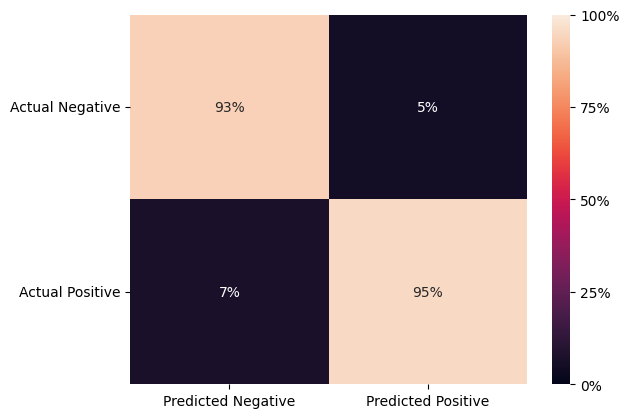

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred2))
confusion = confusion.div(confusion.sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,  precision_score, recall_score

print(f'Accuracy: {round(accuracy_score(y_test, y_pred2), 3)}')
print(f"Log Loss:  {round(log_loss(y_test, y_pred2), 3)}\n")
print(f"F1 Score: {round(f1_score(y_test, y_pred2), 3)}")
print(f"Precision: {round(precision_score(y_test,y_pred2), 3)}")
print(f"Recall: {round(recall_score(y_test, y_pred2), 3)}\n")
print(classification_report(y_test, y_pred2))

Accuracy: 0.941
Log Loss:  2.113

F1 Score: 0.944
Precision: 0.95
Recall: 0.938

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4233
           1       0.95      0.94      0.94      4705

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



### Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
ans3 = dt_model.score(X_test, y_test)
y_pred3 = dt_model.predict(X_test)

print("Desicion Tree\nAccuracy score: ", ans3)

Desicion Tree
Accuracy score:  0.9042291340344596


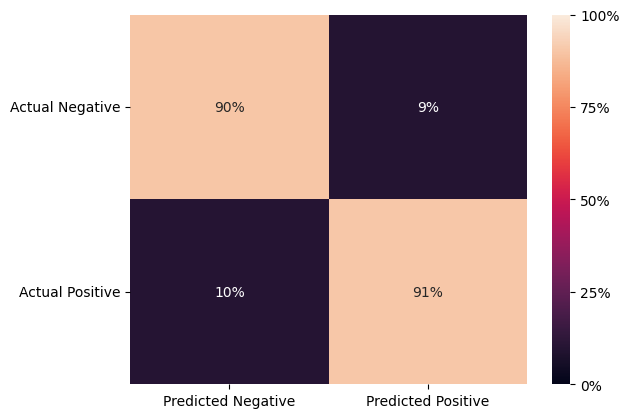

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred3))
confusion = confusion.div(confusion.sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, log_loss, precision_score, recall_score

print(f'Accuracy: {round(accuracy_score(y_test, y_pred3), 3)}')
print(f"Log Loss:  {round(log_loss(y_test, y_pred3), 3)}\n")
print(f"F1 Score: {round(f1_score(y_test, y_pred3), 3)}")
print(f"Precision: {round(precision_score(y_test,y_pred3), 3)}")
print(f"Recall: {round(recall_score(y_test, y_pred3), 3)}\n")
print(classification_report(y_test, y_pred3))

Accuracy: 0.904
Log Loss:  3.452

F1 Score: 0.909
Precision: 0.906
Recall: 0.913

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4233
           1       0.91      0.91      0.91      4705

    accuracy                           0.90      8938
   macro avg       0.90      0.90      0.90      8938
weighted avg       0.90      0.90      0.90      8938



### Voting Classifier (hard)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('NB', model),
                                          ('SVC', svm_model),
                                          ('LogReg', lr_model),
                                          ('DTree', dt_model)],
                              voting='hard')

voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)

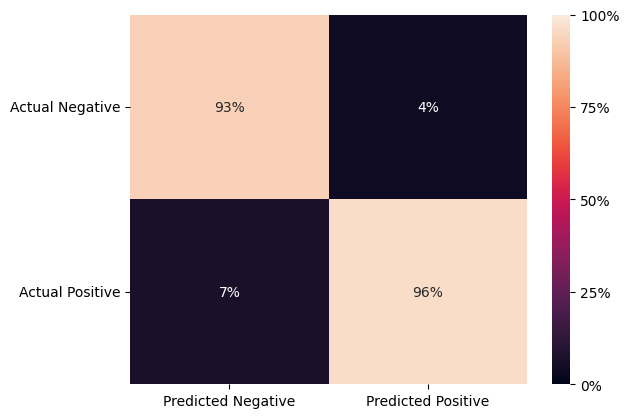

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, preds))
confusion = confusion.div(confusion.sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score, precision_score, recall_score

print(f'Accuracy: {round(accuracy_score(y_test, preds), 3)}')
print(f"Log Loss:  {round(log_loss(y_test, preds), 3)}\n")
print(f"F1 Score: {round(f1_score(y_test, preds), 3)}")
print(f"Precision: {round(precision_score(y_test, preds), 3)}")
print(f"Recall: {round(recall_score(y_test, preds), 3)}\n")

print(classification_report(y_test, preds))

Accuracy: 0.947
Log Loss:  1.899

F1 Score: 0.949
Precision: 0.962
Recall: 0.937

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4233
           1       0.96      0.94      0.95      4705

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938



### Voting Classifier (soft)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf1 = VotingClassifier(estimators=[('NB', model),
                                          ('SVC', svm_model),
                                          ('LogReg', lr_model),
                                          ('DTree', dt_model)],
                              voting='soft')

voting_clf1.fit(X_train, y_train)
preds1 = voting_clf1.predict(X_test)

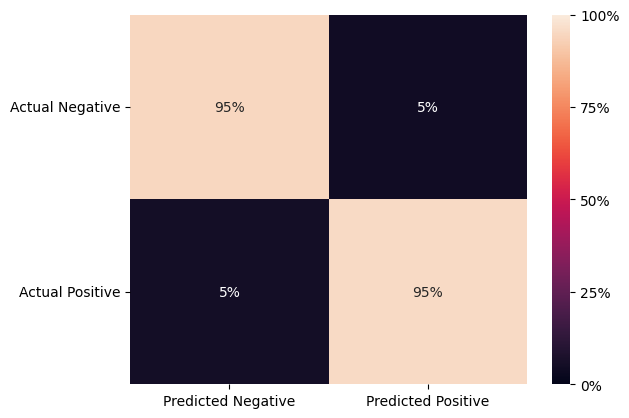

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, preds1))
confusion = confusion.div(confusion.sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score, precision_score, recall_score

print(f'Accuracy: {round(accuracy_score(y_test, preds1), 3)}')
print(f"Log Loss:  {round(log_loss(y_test, preds1), 3)}\n")
print(f"F1 Score: {round(f1_score(y_test, preds1), 3)}")
print(f"Precision: {round(precision_score(y_test, preds1), 3)}")
print(f"Recall: {round(recall_score(y_test, preds1), 3)}\n")

print(classification_report(y_test, preds1))

Accuracy: 0.95
Log Loss:  1.807

F1 Score: 0.952
Precision: 0.954
Recall: 0.951

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4233
           1       0.95      0.95      0.95      4705

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938



### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent=True, nthread=1)

In [ ]:
# A parameter grid for XGBoost
params_1 = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'max_depth': [5, 6, 7]
        }

In [ ]:
%%time

folds = 3  # number of folds to be used

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1)  # define a stratified K-Fold to preserve percentage of each target class

random_search_1 = RandomizedSearchCV(xgb, param_distributions=params_1, n_iter=4, scoring=['roc_auc','accuracy','recall','precision'],
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=2, random_state=1001, refit='roc_auc')

random_search_1.fit(X_train, y_train)
random_search_1.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
CPU times: user 1min 51s, sys: 713 ms, total: 1min 52s
Wall time: 9min 6s


{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 7,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [ ]:
def results_summary(classifier):
    roc_auc_results = classifier.cv_results_['mean_test_roc_auc']
    loc = np.where(roc_auc_results == np.amax(roc_auc_results))[0][0]

    rs_roc_auc = classifier.cv_results_['mean_test_roc_auc'][loc]
    rs_prec = classifier.cv_results_['mean_test_precision'][loc]
    rs_recall = classifier.cv_results_['mean_test_recall'][loc]
    rs_accur = classifier.cv_results_['mean_test_accuracy'][loc]

    print("ROC_AUC = {:.3f}".format(rs_roc_auc))
    print("Precision = {:.3f}".format(rs_prec))
    print("Recall = {:.3f}".format(rs_recall))
    print("Accuracy = {:.3f}".format(rs_accur))

    return [rs_roc_auc,rs_prec,rs_recall,rs_accur] # return array for the final summary

In [ ]:
xgb_results = results_summary(random_search_1)

ROC_AUC = 0.959
Precision = 0.948
Recall = 0.813
Accuracy = 0.879


In [ ]:
xgb_best = random_search_1.best_estimator_

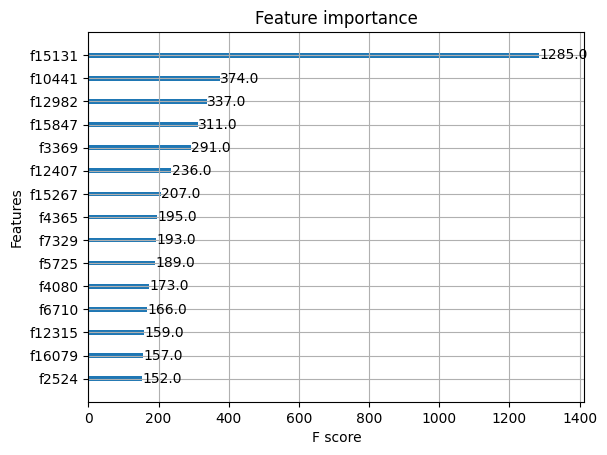

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_best, max_num_features=15) # top 15 most important features
plt.show()

 ### Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

params_2 = {
        'n_estimators': np.arange(100,1200,100),
        'learning_rate': np.arange(0.1,1.1,0.2),
        }


In [ ]:
%%time

random_search_2 = RandomizedSearchCV(ada, param_distributions=params_2, n_iter=4, scoring=['roc_auc','accuracy','recall','precision'],
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001, refit='roc_auc')
random_search_2.fit(X_train, y_train)

ada_best = random_search_2.best_estimator_
ada_results = results_summary(random_search_2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
ROC_AUC = 0.976
Precision = 0.939
Recall = 0.923
Accuracy = 0.928
CPU times: user 7min 4s, sys: 1.59 s, total: 7min 5s
Wall time: 31min 56s


In [ ]:
ada_best.feature_importances_[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)

params_3 = {
        'n_estimators': np.arange(100,1000,100),
        'max_depth': np.arange(30,110,10),
        'bootstrap': [True, False]
        }

In [ ]:
random_search_3 = RandomizedSearchCV(rfc, param_distributions=params_3, n_iter=8, scoring=['roc_auc','accuracy','recall','precision'],cv=skf.split(X_train,y_train), verbose=3, random_state=1001, refit='roc_auc',n_jobs=-1)
random_search_3.fit(X_train, y_train)

rfc_best = random_search_3.best_estimator_
rfc_results = results_summary(random_search_3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
ROC_AUC = 0.977
Precision = 0.939
Recall = 0.907
Accuracy = 0.921


### Voting Classifier (hard)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[("XGB", xgb_best),
                                          ("ADA", ada_best),
                                          ('RFC', rfc_best)],
                              voting='hard')

voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)

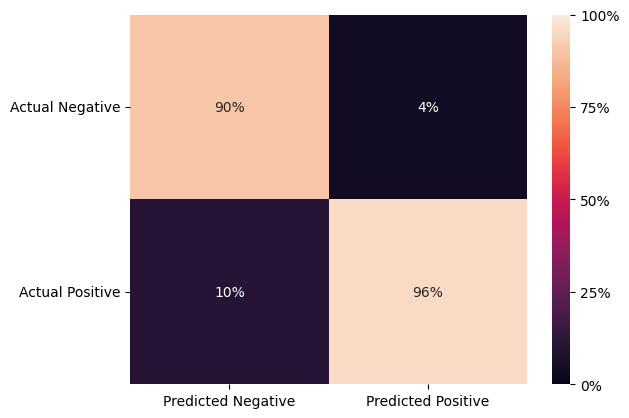

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, preds))
confusion = confusion.div(confusion.sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score, precision_score, recall_score

print(f'Accuracy: {round(accuracy_score(y_test, preds), 3)}')
print(f"Log Loss:  {round(log_loss(y_test, preds), 3)}\n")
print(f"F1 Score: {round(f1_score(y_test, preds), 3)}")
print(f"Precision: {round(precision_score(y_test, preds), 3)}")
print(f"Recall: {round(recall_score(y_test, preds), 3)}\n")

print(classification_report(y_test, preds))

Accuracy: 0.929
Log Loss:  2.557

F1 Score: 0.931
Precision: 0.956
Recall: 0.906

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      4233
           1       0.96      0.91      0.93      4705

    accuracy                           0.93      8938
   macro avg       0.93      0.93      0.93      8938
weighted avg       0.93      0.93      0.93      8938



### Voting Classifier (soft)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf1 = VotingClassifier(estimators=[("XGB", xgb_best),
                                          ("ADA", ada_best),
                                          ('RFC', rfc_best)],
                              voting='soft')

voting_clf1.fit(X_train, y_train)
preds1 = voting_clf1.predict(X_test)

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, preds1))
confusion = confusion.div(confusion.sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score, precision_score, recall_score

print(f'Accuracy: {round(accuracy_score(y_test, preds1), 3)}')
print(f"Log Loss:  {round(log_loss(y_test, preds1), 3)}\n")
print(f"F1 Score: {round(f1_score(y_test, preds1), 3)}")
print(f"Precision: {round(precision_score(y_test, preds1), 3)}")
print(f"Recall: {round(recall_score(y_test, preds1), 3)}\n")

print(classification_report(y_test, preds1))